In [1]:
import imgaug as ia
from imgaug import augmenters as iaa
import matplotlib.pyplot as plt
import pickle
import numpy
import random

import cv2

In [2]:
with open('./anno_2007_trainval.bin','rb') as fp:
    anno = pickle.load(fp)

print(anno[0])

('000005.jpg', [(8, 263, 211, 324, 339), (8, 165, 264, 253, 372), (8, 5, 244, 67, 374), (8, 241, 194, 295, 299), (8, 277, 186, 312, 220)])


In [3]:
rand_sample = random.sample(anno, 8)

In [4]:
def vocshow(anno):
    img = cv2.imread('./VOCdevkit/VOC2007/JPEGImages/'+anno[0])[...,::-1]
    plt.imshow(img)

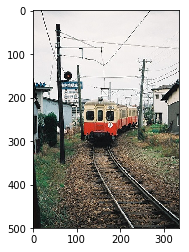

In [7]:
vocshow(rand_sample[0])

In [21]:
rand_sample[0][1]

[(18, 117, 197, 242, 306)]

In [33]:
img = cv2.imread('./VOCdevkit/VOC2007/JPEGImages/'+rand_sample[0][0])[...,::-1]
bbx = ia.BoundingBoxesOnImage([
    ia.BoundingBox(*i[1:],label=i[0]) for i in rand_sample[0][1]
], shape=img.shape)

In [34]:
testaug = iaa.Scale(300)
testaug_det = testaug.to_deterministic()

imgaug = testaug_det.augment_image(img)
bbxaug = testaug_det.augment_bounding_boxes([bbx])[0]

In [35]:
img_before = bbx.draw_on_image(img,thickness=5)
img_after = bbxaug.draw_on_image(imgaug, thickness=5)

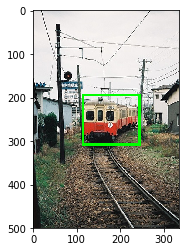

In [36]:
plt.imshow(img_before)

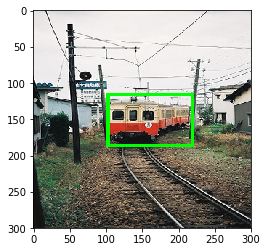

In [38]:
plt.imshow(img_after)